# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Use descriptive variable names,
04. Functions should do only one thing,
05. Check submission deadline on Gradescope, 
06. Rename the file to Last_First_assignment_4, 
07. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
08. Do not submit any other files.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

## Game Theory

In this assignment, we're designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [3]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

## best_response_with_inertia

This function implements the best response with inertia algorithm as describes above in order for a player to choose a move.

* **day** int: the day on which the move is taking place.

* **actions** list: the player's actions.

* **last_action** list: the player's last move.

* **last_opp_action** list: the opponent's last move.


**returns** 

* str: the chosen move.

In [4]:
def best_response_with_inertia(day, actions, last_action, last_opp_action):
    if (day == 0):
        num = random.randint(0, 1)
        return actions[num]
    else:
        prob_lazy = 25
        num = random.randint(1, 100)
        if (num <= prob_lazy):
            return last_action
        else:
            best_move = ''
            best_move_val = float('-inf')
            for action in actions:
                scenario = (action, last_opp_action)
                action_val = get_utility(scenario)[0]
                if (action_val > best_move_val):
                    best_move = action
                    best_move_val = action_val
            return best_move

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [5]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):
        last_action_P1 = ''
        last_action_P2 = ''
        if debug: print(f"--------------------------")
        for day in range(num_days):
            
            # Player should pick an action using the algorithm
            action_P1 = best_response_with_inertia(day, actions_P1, last_action_P1, last_action_P2)
            action_P2 = best_response_with_inertia(day, actions_P2, last_action_P2, last_action_P1)
            last_action_P1 = action_P1
            last_action_P2 = action_P2
            
            # Don't modify below:
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [6]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	H	H
0	1	H	H
0	2	H	H
0	3	H	H
0	4	H	H
0	5	H	H
0	6	H	H
0	7	H	H
0	8	H	H
0	9	H	H
--------------------------
1	0	S	H
1	1	H	S
1	2	H	H
1	3	H	H
1	4	H	H
1	5	H	H
1	6	H	H
1	7	H	H
1	8	H	H
1	9	H	H
--------------------------
2	0	S	S
2	1	S	S
2	2	S	S
2	3	S	S
2	4	S	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	S	H
3	1	H	S
3	2	S	H
3	3	H	H
3	4	H	H
3	5	H	H
3	6	H	H
3	7	H	H
3	8	H	H
3	9	H	H
--------------------------
4	0	H	H
4	1	H	H
4	2	H	H
4	3	H	H
4	4	H	H
4	5	H	H
4	6	H	H
4	7	H	H
4	8	H	H
4	9	H	H
--------------------------
5	0	H	H
5	1	H	H
5	2	H	H
5	3	H	H
5	4	H	H
5	5	H	H
5	6	H	H
5	7	H	H
5	8	H	H
5	9	H	H
--------------------------
6	0	H	H
6	1	H	H
6	2	H	H
6	3	H	H
6	4	H	H
6	5	H	H
6	6	H	H
6	7	H	H
6	8	H	H
6	9	H	H
--------------------------
7	0	H	S
7	1	S	H
7	2	H	S
7	3	H	H
7	4	H	H
7	5	H	H
7	6	H	H
7	7	H	H
7	8	H	H
7	9	H	H
--------------------------
8	0	S	S
8	1	S	S
8	2	S	S
8	3	S	S
8	4	S	S
8	5	S	S
8	6	S	S
8	7	S	S
8	8	S	S
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [7]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

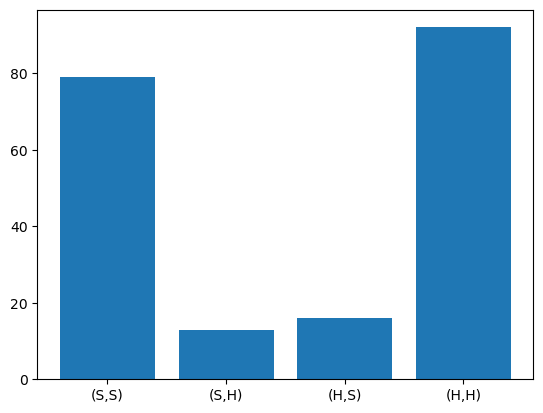

In [8]:
# Visualize the results. Don't modify. 
plot_results(history_P1_action, history_P2_action)

| Question | Comment | 
|------|------|
|Where do agents get stuck? Why? | Agents ultimately get stuck at (S,S) or (H,H) because the highest utility is for both players to do the same move. If the players start out doing the same move they will either choose the best utility, which is doing the same thing as the opponent did last time, or repeat their move, which is the same, thus both resulting in the reptition of the matched (S,S) or (H,H) scenario. If the agents start with different moves they may flip-flop, so to speak, in trying to match their opponent's last move, but eventually one will likely lazily repeat their last move, and because each agent has two possible moves this means the agents will replicate the aforementioned matched scenario and get stuck in (S,S) or (H,H).|

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".